# Text Classification
Submission by Kartik Madan

### Importing Libraries

In [1]:
#For reading docs
import os 

#Tokenize words in documents
from sklearn.feature_extraction.text import CountVectorizer  

#Plotting graph
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#Train-test split
from sklearn.model_selection import train_test_split

#Sci-kit Learn library Naive Bayes Library
from sklearn.naive_bayes import MultinomialNB

#For evaluating scores
from sklearn.metrics import classification_report

### Preparing Dataset

In [2]:
#Reading every document by looping

classes = os.listdir('20_newsgroups')

data = []    #List of string files of every document
target = []   #Corresponding values of every class the doc belongs to from 0-19
i = 0

for single_class in classes:
    
    documents = os.listdir('20_newsgroups/' + single_class)
    
    for single_doc in documents:
        
        file = open('20_newsgroups/' + single_class +'/'+ single_doc)
        
        data.append(file.read())
        target.append(i)
        
        file.close()
    i = i + 1

In [3]:
len(data), len(target)

(19997, 19997)

### Plotting Frequency vs Count of Words Graph

Here, no stop-words or infrequent words are removed from the dictionary, to check the shape of graph

In [4]:
p = np.asarray(CountVectorizer().fit_transform(data).sum(axis = 0)).reshape(-1)

In [5]:
li = Counter(list(p)).most_common()

In [6]:
type(li)

list

In [7]:
y_axis = [tup[1] for tup in li]
x_axis = [tup[0] for tup in li]

No handles with labels found to put in legend.


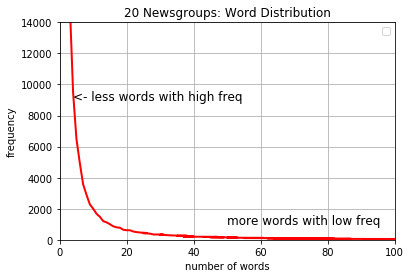

In [8]:
plt.plot(x_axis, y_axis, 'red', linewidth = 2, label = "")

plt.axis([0,100,0,14000])
plt.grid()
plt.text(4,9000, "<- less words with high freq", fontsize = 12)
plt.text(50,1000, "more words with low freq", fontsize = 12)

plt.ylabel("frequency")
plt.xlabel("number of words")
plt.legend()
plt.title("20 Newsgroups: Word Distribution")
plt.show()

### Ignoring stop words and words occuring in less than 1% of documents

In [9]:
vectorizer = CountVectorizer(stop_words='english', min_df = 0.01)

In [10]:
X = vectorizer.fit_transform(data)

In [11]:
print(type(X))
print(X.shape)
print(len(vectorizer.vocabulary_))

<class 'scipy.sparse.csr.csr_matrix'>
(19997, 2127)
2127


In [12]:
# Converting sparse matrix to numpy array
X_array = X.toarray()
Y_array = np.asarray(target)

In [13]:
# Splitting Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array, random_state = 0, test_size = 0.2)

### 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).

In [14]:
clf = MultinomialNB(alpha = 0.1)
clf.fit(X_train, Y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [15]:
Y_pred_inbuilt = clf.predict(X_test)

In [16]:
print(classification_report(Y_test,Y_pred_inbuilt))

             precision    recall  f1-score   support

          0       0.85      0.78      0.81       193
          1       0.84      0.79      0.81       201
          2       0.91      0.82      0.86       197
          3       0.71      0.87      0.78       182
          4       0.78      0.89      0.83       196
          5       0.85      0.74      0.79       196
          6       0.85      0.90      0.87       214
          7       0.89      0.88      0.89       221
          8       0.90      0.97      0.94       224
          9       0.94      0.94      0.94       194
         10       0.93      0.93      0.93       191
         11       0.96      0.95      0.96       194
         12       0.82      0.84      0.83       196
         13       0.95      0.88      0.91       210
         14       0.94      0.94      0.94       195
         15       0.98      1.00      0.99       199
         16       0.78      0.90      0.83       203
         17       0.93      0.86      0.89   

### 2. Implement Naive Bayes on your own from scratch for text classification. 

In [17]:
def fit(X_train, Y_train):
    
    result = {}
    
    class_values = set(Y_train)
    result['total_data'] = len(Y_train)
    
    for current_class in class_values:
        
        result[current_class] = {}
        current_class_rows = (Y_train == current_class) 
        
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        
        num_features = X_train.shape[1]
        total_count = 0
        
        for word_i in range(num_features):
            current_class_word_count = X_train_current[:, word_i].sum()
            result[current_class][word_i] = current_class_word_count
            total_count += current_class_word_count
        
        result[current_class]['total_count'] = total_count    
    return result

In [18]:
def probability(dictionary, x, current_class):
    
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    num_features = len(dictionary[current_class].keys()) - 1
    
    for i in range(len(x)):
        word_i_freq = x[i]
        
        count_word_i_current_class = dictionary[current_class][i] + 1
        count_current_class = dictionary[current_class]["total_count"] + num_features
        
        current_probability = (word_i_freq)*(np.log(count_word_i_current_class)) - np.log(count_current_class)
        output = output + current_probability
    
    return output

In [19]:
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if current_class == 'total_data':
            continue
        p_current_class = probability(dictionary, x, current_class)
        if (first_run or p_current_class > best_p ): 
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [20]:
def predict(dictionary, X_test):
    Y_pred = []
    for X in X_test:
        X_class = predictSinglePoint(dictionary, X)
        Y_pred.append(X_class)
    return Y_pred

In [21]:
dictionary = fit(X_train, Y_train)

In [22]:
Y_pred_self = predict(dictionary, X_test)

### 3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

In [23]:
print(classification_report(Y_test,Y_pred_self))

             precision    recall  f1-score   support

          0       1.00      0.01      0.01       193
          1       0.50      0.01      0.03       201
          2       1.00      0.03      0.05       197
          3       0.67      0.01      0.02       182
          4       0.65      0.08      0.14       196
          5       1.00      0.02      0.03       196
          6       0.26      0.83      0.40       214
          7       0.50      0.00      0.01       221
          8       0.07      1.00      0.13       224
          9       1.00      0.03      0.06       194
         10       1.00      0.02      0.03       191
         11       1.00      0.02      0.04       194
         12       0.00      0.00      0.00       196
         13       0.75      0.01      0.03       210
         14       1.00      0.03      0.05       195
         15       0.67      0.01      0.02       199
         16       1.00      0.02      0.04       203
         17       0.88      0.03      0.06   

C:\Users\magic\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
